# Laboratorio 3

### K-means, GMMs, Árboles y Random Forests

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2018-I

#### Profesor: Antonio Tamayo Herrera

### Integrantes:

#### Nombre: David de Jesus Yepes Isaza
#### Cédula: 1020455542

#### Nombre: Rodrigo Antonio Porras Martinez
#### Cédula: 1039459720

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Ejercicio 1

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al método KMeans de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

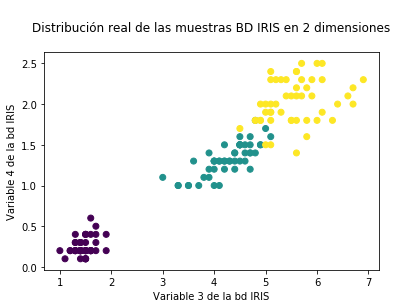



Descubriendo las clases con el método kMeans


Descubriendo 1 clusters:



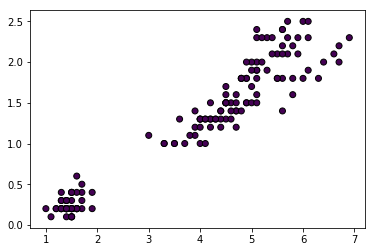

Descubriendo 2 clusters:



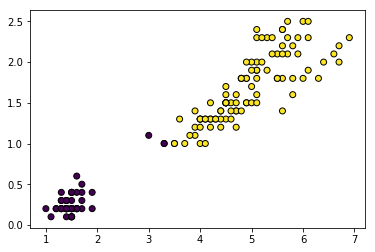

Descubriendo 3 clusters:



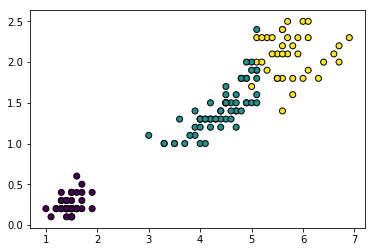

Descubriendo 4 clusters:



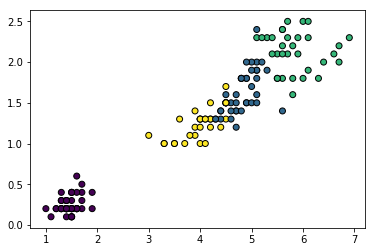

Descubriendo 5 clusters:



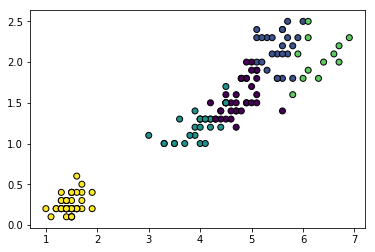

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

plt.scatter(X[:,2], X[:,3], c=y)
plt.title(u'\nDistribución real de las muestras BD IRIS en 2 dimensiones\n')
plt.xlabel('Variable 3 de la bd IRIS')
plt.ylabel('Variable 4 de la bd IRIS')
plt.show()

print('\n\nDescubriendo las clases con el método kMeans\n\n')

for k in range(1,6,1):
    
    print('Descubriendo ' + str(k) + ' clusters:\n')
    #Complete el código llamando al método KMeans usando inicialización de los centroides de manera aleatoria
    #usando las muestras de entrenamiento, tal como lo explicamos en clase. Use el algorítmo EM para el
    #Entrenamiento
    kmeans = KMeans(n_clusters=k, init='random', algorithm='full').fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float), edgecolor='k')
    plt.show()
    
    

1.1 Seg&uacute;n los resultados encontrados y la base de datos usada, cu&aacute;l es el n&uacute;mero de clusters &oacute;ptimo para este problema? Argumente por qu&eacute;.

Responda aquí: Por el dominio del problema conocemos que tipos de flores solo hay tres, conocemos que los datos no estan dispersos a gran medida y por eso encontrar subgrupos es mas dificil. Luego de 3 clusters aparecen subgrupos dentro de las mismas clases, lo que hace que el algoritmo les asgine una clase diferente siendo erroneo.  Entre mas cluster mas sobre ajuste hay en las muestras.

## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo GMMs de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

from __future__ import division

def class_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return "accuracy: " + str(1-(err/np.size(y_est)))

iris = datasets.load_iris()

#Partiendo la base de datos de entrenamiento en 75% para entrenar y 25% para validar
skf = StratifiedKFold(n_splits=4)
# Tomando solo el primer fold
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))
#Complete el código aquí con la llamada al método GaussianMixture. Recuerde 
#que ya tiene el número de Gaussianas en n_classes
estimator = GaussianMixture(n_components=n_classes, covariance_type='diag')

#Con la base de datos se realiza una inicialización de las medias de cada Gaussiana de manera supervisada
estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

#Complete el codigo aqui entrenando (ajustando) el modelo con la base de datos de entrenamiento
estimator.fit(X_train)
    
print ("Eficiencia en la fase de entrenamiento:")
y_train_pred = estimator.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print (train_accuracy)

print ("\nEficiencia en la fase de validación:")
#Complete el código aquí prediciendo el la clase para las muestras de validación
y_test_pred = estimator.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print (test_accuracy)

print ("\n")
print (class_error(y_test_pred, y_test))


Eficiencia en la fase de entrenamiento:
93.69369369369369

Eficiencia en la fase de validación:
89.74358974358975


accuracy: 0.8974358974358975


2.1 Ejecute el código de GMMs de la celda anterior usando una matriz de var-cov completa, esférica y diagonal. Qué observa en la eficiencia del modelo en cada uno de los tres casos? Cómo interpreta esos resultados?

Responda aquí: Full= (94.59 - 97.43)   spherical=(88.28 - 92.30)  diag = (92.79 - 89.74)
Se puede ver que la usando la matriz de coovarianzas completa (full) obtenemos un mejor resultado en la validacion para ambos casos entrenamiento y validacion.


2.2  Según la partición que se realizó a la base de datos para entrenamiento y validación, se puede afirmar que se está aplicando la metodología de validación correctamente? Responda sí o no y por qué.

Responda aquí: Se puede ver que hacen una particion con ayuda de la funcion StratifiedKFold que usa la validacion cruzada, es un metodo de validacion en que se mueve de manera aleatoria entre cada folds. En la particion anterior aunque se hacen las divisiones no se cambia de fold por lo que no hay aleatoriedad. Validando solo con ese pequeño grupo de muestras. Se podria decir que el Modelo hasta el momento solo es eficiente con esas muestras de test o solo el primer Fold.


## Ejercicio 3

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo de árboles de decisión para clasificación de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/tree.html#classification

accuracy: 0.9743589743589743


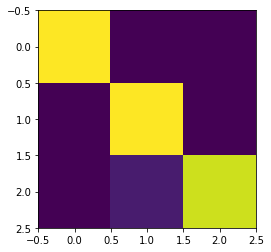

In [10]:
from __future__ import division
from sklearn import tree
from sklearn.metrics import confusion_matrix

def class_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return "accuracy: " + str(1-(err/np.size(y_est)))

#Nota: con este modelo debe usar la misma base de datos IRIS que ya fue cargada para el modelo del ejercicio 2.

#Complete el código aquí creando el modelo de árbol clasificador y entrenandolo unicamente con las muestras de entrenamiento
#de la base de datos

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)



#Complete el código aquí prediciendo la clase para las muestras de validación (test) de la base de datos.
y_pred = clf.predict(X_test)
print (class_error(y_pred, y_test))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(cnf_matrix)
plt.show()

3.1 Seg&uacute;n la documentaci&oacute;n, cu&aacute;l medida de impureza  se usa? sino se especifica en el parametro criterio usa Gini, pero tambien puede usar la entropia.

Responda aqu&iacute;:

3.2 Seg&uacute;n la documentaci&oacute;n, se le permite al &aacute;rbol crecer a su m&aacute;xima profundidad? Argumente
su respuesta relacionandola con el valor de la medida de impuraza usada y el valor alcanzado por la misma en los nodos terminales.

Responda aqu&iacute;: Por defecto se le es permitido llegar hasta  lo mas profundo, ya sea que  el nodo sea puro que en este caso nos lo dice el coeficiente de GINI o cada hoja tenga por lo menos una muestra. Por defecto el metodo siempre parte los nodos con el minimo de muestras que es dos y el numero  de muestras minimas por hoja que es 1. Cuando se crean arboles de mucha profundida se es dificil generalizar  los datos, si se llega a que cada hoja del arbol solo tiene una muestra a esto se le llama sobreajuste. Si hay un sobre ajuste en cada nodo la impureza seria cero.

## Ejercicio 4

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo de árboles de decisión para regresión de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/tree.html#regression

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold

#Error cuadrático medio (para problemas de regresión)
def ECM(Y_est,Y_real):
    N = np.size(Y_real)
    ecm = sum((Y_est - Y_real)**2)/N
    return ecm 

#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository 
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:,0:12]
Y = db[:,12]

#Numero de muestras
print("Numero de muestras: "+str(np.size(X,0)))

#Normalizamos los datos
X = normalize(X, axis=0, norm='l1')

Errores = np.zeros(10)
j = 0
#Aplicando Cross-validation con 10 folds

kf = KFold(n_splits=10)
#variable  k  para conocer el numero de iteraciones
k=1

for train_index, test_index in kf.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  
    
    #numero de muestras de entrenamiento
    print("Numero de muestras de entrenamiento: "+str(np.size(X_train,0)))
    
    #numero de muestras de entrenamiento
    print("Numero de muestras de validacion: "+str(np.size(X_test,0)))
    
    #Complete el código aquí creando el modelo de árbol para regresión y entrenando el modelo solo con las muestras
    #de entrenamiento de la base de datos
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)
    #print(k)
    k=k+1

    #Complete el código aquí prediciendo el valor para la variable de salida de las muestras de validación
    #de la base de datos
    Y_est = clf.predict(X_test)

    Errores[j] = ECM(Y_est, y_test)
    
print ("accuracy: "+str(1-np.mean(Errores)))


Numero de muestras: 9357
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8421
Numero de muestras de validacion: 936
Numero de muestras de entrenamiento: 8422
Numero de muestras de validacion: 935
Numero de muestras de entrenamiento: 8422
Numero de muestras de validacion: 935
Numero de muestras de entrenamiento: 8422
Numero de muestras de validacion: 935
accuracy: 0.9998510029448455


Revise el número de muestras que tiene la base de datos con la que se está trabajando el problema de regresión.

4.1 Cuántas muestras tiene?

Responda aquí: la db tiene 9358 muestras, se debe tener en cuenta que la posicion 0 es una muestra.

4.2 Cuántas iteraciones se est&aacute;n realizando seg&uacute;n la metodolog&iacute;a de validaci&oacute;n aplicada?

Responda aquí: Segun el metodo de validacion son  10 iteraciones

4.3 C&oacute;mo se llama la metodolog&iacute;a de validaci&oacute;n aplicada?

Responda aquí: la metodologia se llama validacion cruzada (cross-validation)

4.4 Con cuántas muestras se está entrenando el modelo en cada iteraci&oacute;n?

Responda aquí: las primeras 7 veces con 8422 y las ultimas tres iteraciones 8423


4.5 Con cuántas se está validando en cada iteraci&oacute;n?

Responda aquí:las primeras 7 iteraciones con 936 muestras y para las ultimas tres 935 muestras


Nota: deje constancia en la celda anterior del código que usó para responder las preguntas anteriores.

4.6 Qué puede decir del costo computacional del modelo de árboles de regresión al ver su rendimiento con esta base de
datos? 

Responda aquí: El costo de usar un arbol crece a medida que crece su complejidad, es decir que puede ser muy eficiente creando cada nodo a un nivel tres o puede llegar a una hoja por muestra. Para este caso, es mas eficientes que los algoritmos anteriores debido a que su ejecucion toma aproximadamente 2 segundos para 9358 muestras. Para los laboratorios anteriores con esta base de datos los algoritmos no alcanzaban a terminar.


## Ejercicio 5

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo Random Forests para clasificación de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [12]:
from sklearn.ensemble import RandomForestClassifier

def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return err/np.size(y_est)


iris = datasets.load_iris()

X = iris.data
Y = iris.target

Errores = np.zeros(10)
j = 0
#Aplicando Cross-validation con 10 folds

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  


    #Complete el código aquí creado el modelo Random Forest para clasificar y entrenandolo solo con las muestras
    #para entrenamiento de la base de datos IRIS
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    #Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
    Y_est = clf.predict(X_test)
    
    Errores[j] = classification_error(Y_est, y_test)
    j += 1

print ("accuracy: " + str(1-np.mean(Errores)))

accuracy: 0.9633333333333334


Compare la eficiencia arrojada por Random Forests y por los árboles de clasificación.

5.1 Cuál modelo es mejor?

Responda aquí: La eficiciencia de Random Forest es de 0.95 mientras que el arbol de desicion es de 0.99, por esa razon para este caso el arbol de desicion obtiene un mejor resultado, aunque ambos modelos obtienen resultados muy buenos.

5.2 Por qué cree que se comporta mejor un modelo que el otro?

Responda aquí: El arbol de desicion se ejecuta mas rapido por que solo debe hacer un arbol con los datos, ademas de que es posible que la distribucion de los datos ayude para que el arbol no tenga sobreajuste. Con el random forest se crean mucho arboles para evitar el sobreajuste, por eso se demora mas en dar sus resultados. Para nuestro caso el mejor es radom forest ya que a su objetivo es eliminar el sobreajuste es mas confiable, existe la posibilidad de que el resultado del arbol de desicion sea tan bueno por que esta sobreajustado.

